In [1]:
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

from nn_interpretability.interpretation.deepdream.dream import DeepDream
from nn_interpretability.model.model_trainer import ModelTrainer
from nn_interpretability.model.model_repository import ModelRepository
from nn_interpretability.visualization.rgb_visualizer import RGBVisualizer

# I. Deep Dream

## 1. Model

In [2]:
model = torchvision.models.vgg16(pretrained=True)
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

## 2. Input Image

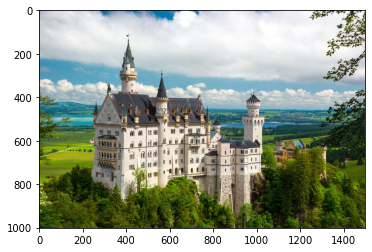

In [3]:
img_path = './data/castle.jpg'
image = RGBVisualizer.read_img(img_path)
image = RGBVisualizer.preprocess(image)

In [4]:
lr = 0.05
reg_term = 1e-3
epochs = 40

In [5]:
# slice(None) to use layer objective
interpretor = DeepDream(model.features, None, 27, slice(None), lr, reg_term, epochs, 10, 512)
end_point = interpretor.interpret(image)

/home/hans/dl_env/.venv/lib/python3.6/site-packages/torch/nn/functional.py:2494: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
  5%|▌         | 2/40 [00:00<00:03, 11.93it/s]

Processing octave -5


  2%|▎         | 1/40 [00:00<00:05,  6.74it/s]

Processing octave -4


  0%|          | 0/40 [00:00<?, ?it/s]

Processing octave -3


  0%|          | 0/40 [00:00<?, ?it/s]

Processing octave -2


  0%|          | 0/40 [00:00<?, ?it/s]

Processing octave -1


  0%|          | 0/40 [00:00<?, ?it/s]

Processing octave 0


100%|██████████| 40/40 [01:52<00:00,  2.82s/it]


Processing octave 1


100%|██████████| 40/40 [04:26<00:00,  6.66s/it]


Processing octave 2


100%|██████████| 40/40 [10:19<00:00, 15.48s/it]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


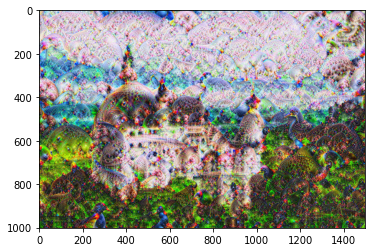

In [6]:
dream_img = RGBVisualizer.postprocess(end_point)
plt.imshow(dream_img)
plt.show()
RGBVisualizer.save_img(dream_img)